# CNN

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

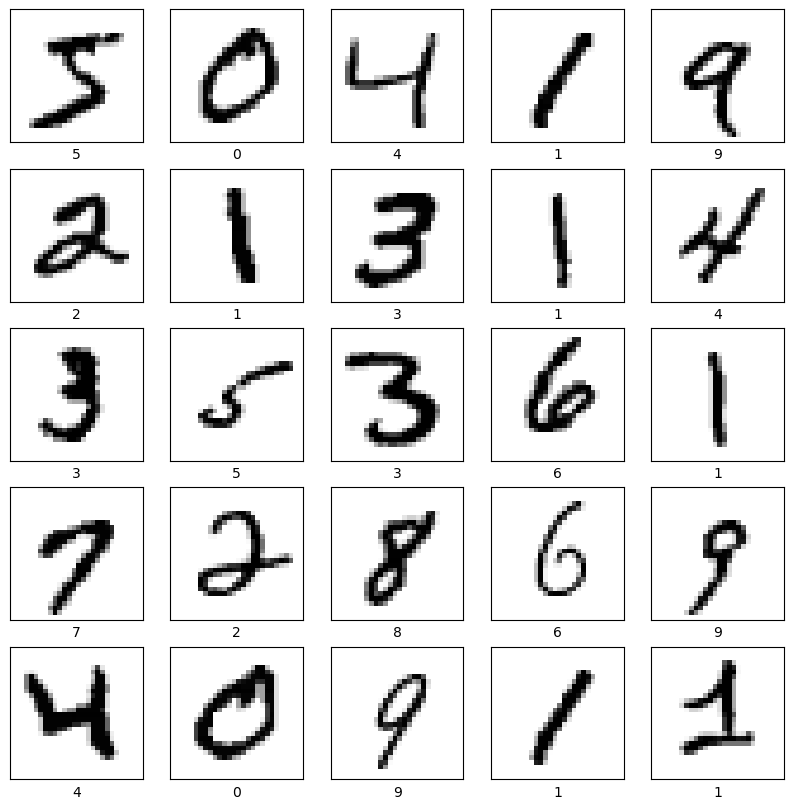

In [4]:

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i],cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [5]:
print(len(x_train))
print(len(x_test))

60000
10000


In [6]:
print(x_train.shape)

(60000, 28, 28)


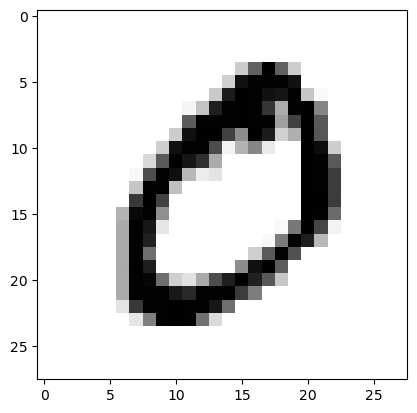

In [7]:
plt.imshow(x_train[1],cmap=plt.cm.binary)

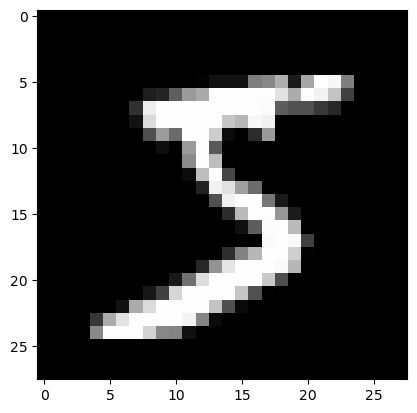

In [8]:
plt.imshow(x_train[0],cmap="gray")

In [9]:
print("pixel values")
for rows in x_train[0]:
    for pixel in rows:
        print("{:3}".format(pixel),end=" ")
    print()

pixel values
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0

In [10]:
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

Pixel values after normalization
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.01 0.07 0.07 0.07 0.49 0.53 0.69 0.10 0.65 1.00 0.97 0.50 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.12 0.14 0.37 0.60 0.67 0.99 0.99 0.99 0.99 0.99 0.88 0.67 0.99 0.95 0.76 0.25 0

<Figure size 640x480 with 0 Axes>

<Axes: >

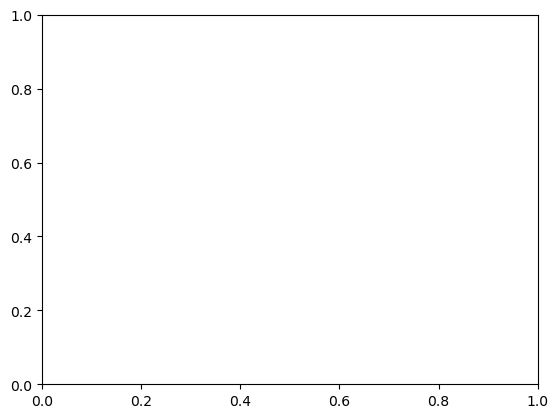

: 

In [ ]:
print("Pixel values after normalization")
for rows in x_train[0]:
    for pixel in rows:
        print("{:.2f}".format(pixel),end=" ")
    print()
    
# reshape image dimensions to include channel information
x_train=x_train.reshape((x_train.shape[0],28,28,1))
x_test=x_test.reshape((x_test.shape[0],28,28,1))

display(plt.gcf())
display(plt.gca())

In [ ]:
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.InputLayer(input_shape=(28,28,1)),
    
    layers.Conv2D(filters=10, kernel_size=(3,3), activation="relu"),
    layers.Conv2D(filters=10, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(filters=20, kernel_size=(3,3), activation="relu"),
    layers.Conv2D(filters=20, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(100, activation="softmax"),
])


In [ ]:
model.summary()

In [ ]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

In [ ]:
model.fit(x_train,y_train,epochs=5,batch_size=64,validation_split=0.2)